In [18]:
import pytz
from datetime import datetime
utc_now = datetime.now(pytz.utc)  # Get current UTC time
kolkata_tz = pytz.timezone('Asia/Kolkata')
kolkata_now = utc_now.astimezone(kolkata_tz)
kolkata_now_str = kolkata_now.strftime('%Y-%m-%d %H:%M:%S')
kolkata_now_str

'2025-01-06 18:58:47'

In [ ]:
#from azure.identity import DefaultAzureCredential
import os 
from dotenv import load_dotenv
from azure.keyvault.secrets import SecretClient
from azure.storage.blob import BlobServiceClient
from azure.identity import ClientSecretCredential
load_dotenv()
tenant_id=os.getenv('tenant_id_env')
client_id=os.getenv('client_id_env')
client_secret=os.getenv('client_secret_env')
credential = ClientSecretCredential(tenant_id,client_id,client_secret)

key_vault_url = "https://retinopathykeyvault.vault.azure.net/"

# Authenticate using Azure Default Credentials (which will use az login when run locally)
#credential = DefaultAzureCredential()
key_vault_client = SecretClient(vault_url=key_vault_url,credential=credential)

# Replace this with your secret's name in Key Vault
secret_name = "keydrinf"

try:
    # Retrieve the secret from Key Vault
    retrieved_secret = key_vault_client.get_secret(secret_name)
    storage_access_key = retrieved_secret.value
    print("Successfully retrieved the storage access key from Key Vault.")

    # Azure Storage Account Name
    storage_account_name = "gnayana"

    # Create the connection string using the access key
    connection_string = f"DefaultEndpointsProtocol=https;AccountName={storage_account_name};AccountKey={storage_access_key};EndpointSuffix=core.windows.net"

    # Connect to Azure Blob Storage
    blob_service_client = BlobServiceClient.from_connection_string(connection_string)

    # List containers to verify access
    containers = blob_service_client.list_containers()
    print("Containers in the storage account:")
    for container in containers:
        print(f"- {container.name}")

except Exception as e:
    print(f"Error: {e}")


Successfully retrieved the storage access key from Key Vault.
Containers in the storage account:
- azureml
- azureml-blobstore-4fdd6af3-f731-4429-a1ee-8d61bd9e930f
- inference
- insights-logs-auditevent
- insights-metrics-pt1m


In [ ]:
from azure.identity import DefaultAzureCredential
from azure.keyvault.secrets import SecretClient

# Replace with your Key Vault URL
key_vault_url = "https://retinopathykeyvault.vault.azure.net/secrets/BlobStorageAccessKey/1f5307407ffa4833b3f1820c1dda48a4"

# Authenticate using Azure Default Credentials
credential = DefaultAzureCredential()
client = SecretClient(vault_url=key_vault_url, credential=credential)

# Retrieve the secret
secret_name = "BlobStorageAccessKey"
retrieved_secret = client.get_secret(secret_name)

print(f"Blob Storage Access Key: {retrieved_secret.value}")


In [3]:
from google_images_download import google_images_download

def download_google_images(query, k=5, save_dir="google_images"):
    # Initialize the downloader
    response = google_images_download.googleimagesdownload()
    
    # Define search parameters
    arguments = {
        "keywords": query,
        "limit": k,
        "print_urls": False,
        "output_directory": save_dir,
        "no_directory": True,  # Save images directly without subfolders
    }
    
    # Download the images
    try:
        response.download(arguments)
        print(f"Downloaded {k} images for '{query}' in '{save_dir}'")
    except Exception as e:
        print(f"Error: {e}")

# Example usage
download_google_images(query="random nature", k=5)



Item no.: 1 --> Item name = random nature
Evaluating...
Starting Download...


Unfortunately all 5 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0

Downloaded 5 images for 'random nature' in 'google_images'


In [6]:
from icrawler.builtin import GoogleImageCrawler

def download_images_icrawler(query, k=5, save_dir="images"):
    # Initialize Google Image Crawler
    google_crawler = GoogleImageCrawler(storage={"root_dir": save_dir})
    google_crawler.crawl(keyword=query, max_num=k)
    print(f"Downloaded {k} images for '{query}' in '{save_dir}'")

# Example usage
download_images_icrawler(query="random nature", k=5)


ModuleNotFoundError: No module named 'icrawler'

In [7]:
import requests
import os

def download_picsum_images(k=5, save_dir="random_images"):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    for i in range(k):
        response = requests.get(f"https://picsum.photos/400/300?random={i}")
        if response.status_code == 200:
            with open(f"{save_dir}/image_{i+1}.jpg", "wb") as f:
                f.write(response.content)
            print(f"Downloaded random image {i+1}")
        else:
            print(f"Failed to download image {i+1}")

# Example usage
download_picsum_images(k=5)


Downloaded random image 1
Downloaded random image 2
Downloaded random image 3
Downloaded random image 4
Downloaded random image 5


In [8]:
from icrawler.builtin import GoogleImageCrawler

def download_images_icrawler(query, k=5, save_dir="images"):
    # Initialize Google Image Crawler
    google_crawler = GoogleImageCrawler(storage={"root_dir": save_dir})
    google_crawler.crawl(keyword=query, max_num=k)
    print(f"Downloaded {k} images for '{query}' in '{save_dir}'")

# Example usage
download_images_icrawler(query="random nature", k=5)


ModuleNotFoundError: No module named 'icrawler'

Original Image:


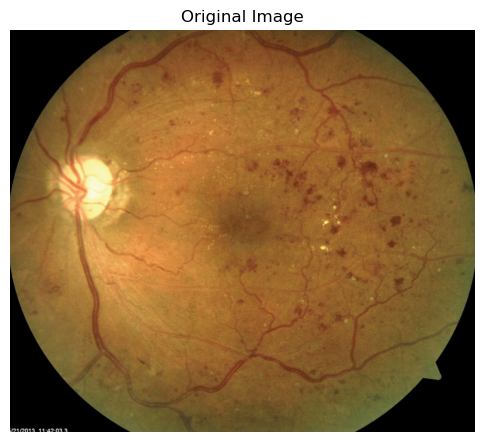

Trimmed Image:


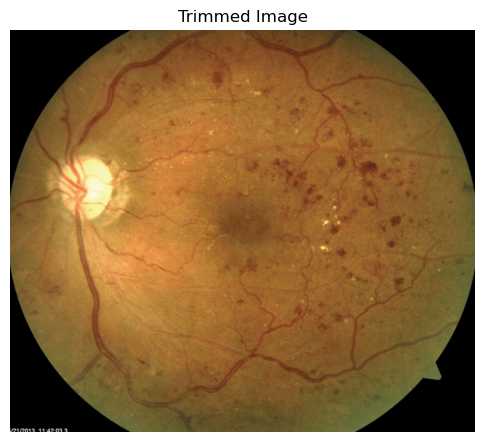

Resized Image:


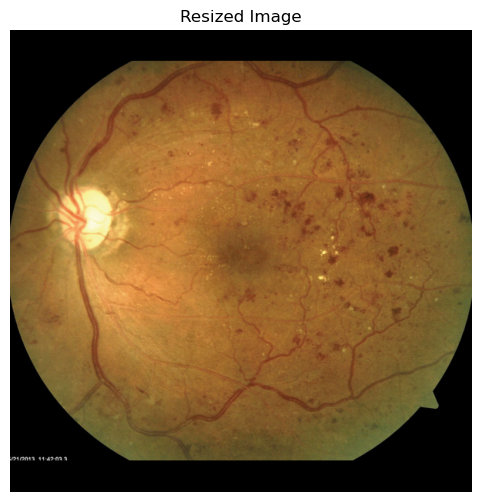

Final Image with CLAHE:


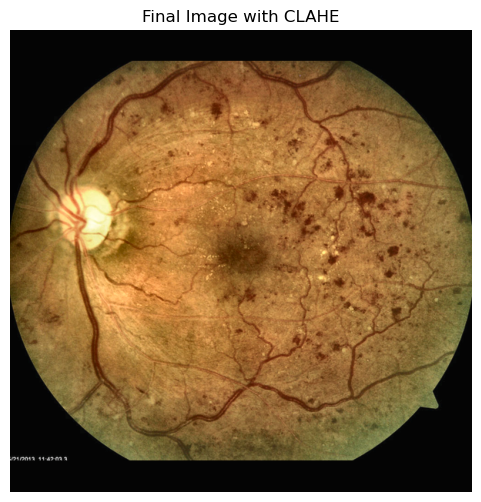

In [1]:
# Imports
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Function to display images
def display_image(image, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Trimming function
def trim(im):
    percentage = 0.02
    img = np.array(im)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    im_bin = img_gray > 0.1 * np.mean(img_gray[img_gray != 0])
    row_sums = np.sum(im_bin, axis=1)
    col_sums = np.sum(im_bin, axis=0)
    rows = np.where(row_sums > img.shape[1] * percentage)[0]
    cols = np.where(col_sums > img.shape[0] * percentage)[0]
    min_row, min_col = np.min(rows), np.min(cols)
    max_row, max_col = np.max(rows), np.max(cols)
    im_crop = img[min_row:max_row + 1, min_col:max_col + 1]
    return Image.fromarray(im_crop)

# Resize function to maintain aspect ratio
def resize_maintain_aspect(image, desired_size):
    old_size = image.size
    ratio = float(desired_size) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])
    im = image.resize(new_size, Image.LANCZOS)
    new_im = Image.new("RGB", (desired_size, desired_size))
    new_im.paste(im, ((desired_size - new_size[0]) // 2, (desired_size - new_size[1]) // 2))
    return new_im

# CLAHE application for color enhancement
def apply_clahe_color(image):
    lab = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    final_image = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    return Image.fromarray(final_image)

# Main processing function
def process_image(image, img_size):
    print("Original Image:")
    display_image(image, "Original Image")
    
    trimmed_image = trim(image)
    print("Trimmed Image:")
    display_image(trimmed_image, "Trimmed Image")
    
    resized_image = resize_maintain_aspect(trimmed_image, img_size)
    print("Resized Image:")
    display_image(resized_image, "Resized Image")
    
    final_image = apply_clahe_color(resized_image)
    print("Final Image with CLAHE:")
    display_image(final_image, "Final Image with CLAHE")
    
    return final_image

# Parameters
IMG_SIZE = 600  # Desired image size

# Load and process the image
image_path = r"C:\Users\DELL\Desktop\g-nayana-data\DR1-modal.jpg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")

# Process the image
processed_image = process_image(image, IMG_SIZE)


Image with Black Border:


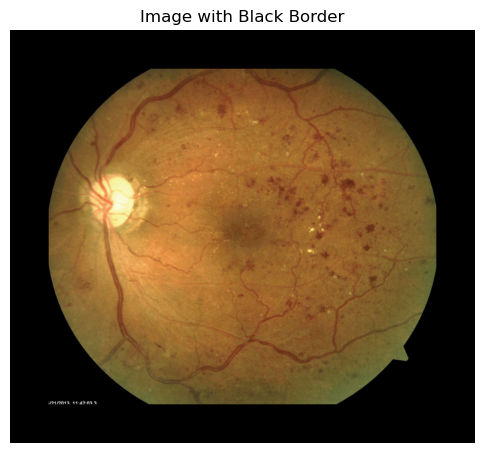

Original Image:


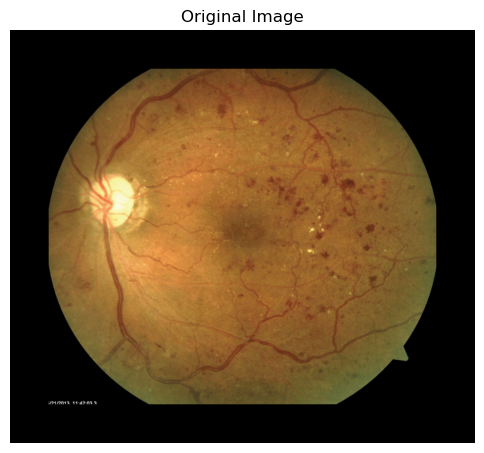

Saved: C:\Users\DELL\Desktop\Processed_Images\Original_Image.jpg
Trimmed Image:


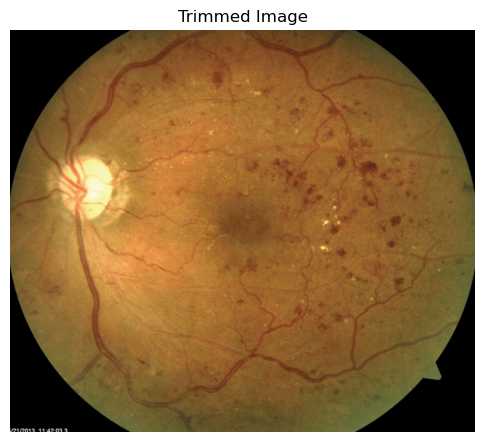

Saved: C:\Users\DELL\Desktop\Processed_Images\Trimmed_Image.jpg
Resized Image:


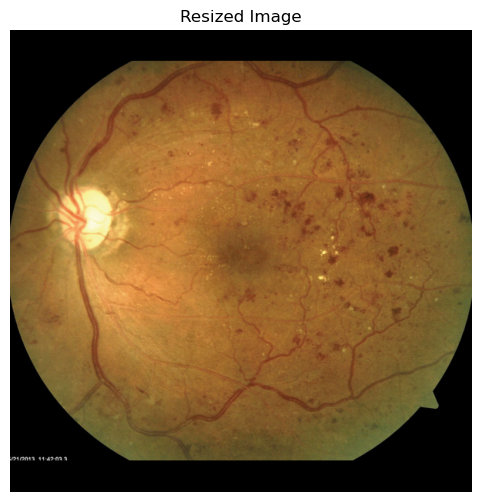

Saved: C:\Users\DELL\Desktop\Processed_Images\Resized_Image.jpg
Final Image with CLAHE:


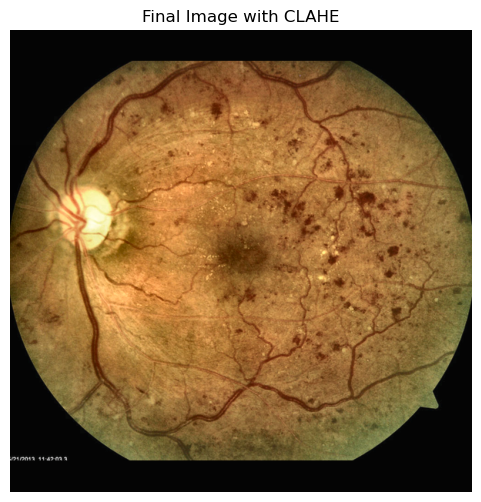

Saved: C:\Users\DELL\Desktop\Processed_Images\Final_Image_with_CLAHE.jpg


In [1]:
# Imports
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os

# Function to display images
def display_image(image, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to add black padding to the image
def add_black_border(image, padding_size):
    img_with_border = Image.new(
        "RGB",
        (image.width + 2 * padding_size, image.height + 2 * padding_size),
        (0, 0, 0)  # Black background
    )
    img_with_border.paste(image, (padding_size, padding_size))
    return img_with_border

# Trimming function
def trim(im):
    percentage = 0.02
    img = np.array(im)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    im_bin = img_gray > 0.1 * np.mean(img_gray[img_gray != 0])
    row_sums = np.sum(im_bin, axis=1)
    col_sums = np.sum(im_bin, axis=0)
    rows = np.where(row_sums > img.shape[1] * percentage)[0]
    cols = np.where(col_sums > img.shape[0] * percentage)[0]
    min_row, min_col = np.min(rows), np.min(cols)
    max_row, max_col = np.max(rows), np.max(cols)
    im_crop = img[min_row:max_row + 1, min_col:max_col + 1]
    return Image.fromarray(im_crop)

# Resize function to maintain aspect ratio
def resize_maintain_aspect(image, desired_size):
    old_size = image.size
    ratio = float(desired_size) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])
    im = image.resize(new_size, Image.LANCZOS)
    new_im = Image.new("RGB", (desired_size, desired_size))
    new_im.paste(im, ((desired_size - new_size[0]) // 2, (desired_size - new_size[1]) // 2))
    return new_im

# CLAHE application for color enhancement
def apply_clahe_color(image):
    lab = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    final_image = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    return Image.fromarray(final_image)

# Function to save images
def save_image(image, title, output_folder):
    image_path = os.path.join(output_folder, f"{title}.jpg")
    image.save(image_path)
    print(f"Saved: {image_path}")

# Main processing function updated to save images without the black border
def process_image_and_save(image, img_size, output_folder):
    print("Original Image:")
    display_image(image, "Original Image")
    save_image(image, "Original_Image", output_folder)
    
    trimmed_image = trim(image)
    print("Trimmed Image:")
    display_image(trimmed_image, "Trimmed Image")
    save_image(trimmed_image, "Trimmed_Image", output_folder)
    
    resized_image = resize_maintain_aspect(trimmed_image, img_size)
    print("Resized Image:")
    display_image(resized_image, "Resized Image")
    save_image(resized_image, "Resized_Image", output_folder)
    
    final_image = apply_clahe_color(resized_image)
    print("Final Image with CLAHE:")
    display_image(final_image, "Final Image with CLAHE")
    save_image(final_image, "Final_Image_with_CLAHE", output_folder)
    
    return final_image

# Parameters
IMG_SIZE = 600  # Desired image size

# Folder to save the images
output_folder = r"C:\Users\DELL\Desktop\Processed_Images"  # Replace with your desired output folder
os.makedirs(output_folder, exist_ok=True)

# Load your image
image_path =r"C:\Users\DELL\Desktop\g-nayana-data\DR1-modal.jpg"   # Replace with your image path
image = Image.open(image_path).convert("RGB")

# Add black border to the image
padding_size = 100  # Adjust the size of the black border
image_with_black_border = add_black_border(image, padding_size)

print("Image with Black Border:")
display_image(image_with_black_border, "Image with Black Border")

# Process the image with the added black border and save without the black border
processed_image_without_black_border = process_image_and_save(image_with_black_border, IMG_SIZE, output_folder)




In [39]:

import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import numpy as np
import cv2
import os

# Define constants
IMG_SIZE = 600
NUM_CLASSES = 4

CATEGORY_MAPPING = {
    0: "Normal",
    1: "Mild Diabetic Retinopathy",
    2: "Moderate/Severe Diabetic Retinopathy",
    3: "Proliferative Diabetic Retinopathy",
}

explanation_labels = {
    0: "Normal: No signs of diabetic retinopathy detected.",
    1: "Mild: Early signs of diabetic retinopathy detected.",
    2: "Moderate/Severe: Advanced diabetic retinopathy with potential vision issues.",
    3: "Proliferative: Risk of severe vision loss, immediate action required.",
}

# Model definition
class EfficientNetB3Model(nn.Module):
    def __init__(self, num_classes):
        super(EfficientNetB3Model, self).__init__()
        self.efficientnet = models.efficientnet_b3(weights=None)
        num_ftrs = self.efficientnet.classifier[1].in_features
        self.efficientnet.classifier = nn.Sequential(
            nn.Linear(num_ftrs, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.2),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.2),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.efficientnet(x)

# Image preprocessing functions
def trim(im):
    percentage = 0.02
    img = np.array(im)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    im_bin = img_gray > 0.1 * np.mean(img_gray[img_gray != 0])
    row_sums = np.sum(im_bin, axis=1)
    col_sums = np.sum(im_bin, axis=0)
    rows = np.where(row_sums > img.shape[1] * percentage)[0]
    cols = np.where(col_sums > img.shape[0] * percentage)[0]
    min_row, min_col = np.min(rows), np.min(cols)
    max_row, max_col = np.max(rows), np.max(cols)
    im_crop = img[min_row:max_row + 1, min_col:max_col + 1]
    return Image.fromarray(im_crop)

def resize_maintain_aspect(image, desired_size):
    old_size = image.size
    ratio = float(desired_size) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])
    im = image.resize(new_size, Image.LANCZOS)
    new_im = Image.new("RGB", (desired_size, desired_size))
    new_im.paste(im, ((desired_size - new_size[0]) // 2, (desired_size - new_size[1]) // 2))
    return new_im

def apply_clahe_color(image):
    lab = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    final_image = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    return Image.fromarray(final_image)

def process_image(image):
    trimmed_image = trim(image)
    resized_image = resize_maintain_aspect(trimmed_image, IMG_SIZE)
    final_image = apply_clahe_color(resized_image)
    return final_image

# Transform for inference
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Inference functions
def infer(model, image_path, transform):
    img = Image.open(image_path).convert("RGB")
    processed_img = process_image(img)
    img_tensor = transform(processed_img).unsqueeze(0).to(DEVICE)
    
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        confidence, predicted = torch.max(probabilities, 1)
    
    return predicted.item(), confidence.item()

# Load the model
model = EfficientNetB3Model(NUM_CLASSES).to(DEVICE)
checkpoint = torch.load(BEST_MODEL_PATH, map_location=DEVICE)
model.load_state_dict(checkpoint['model_state_dict'], strict=False)
model.eval()

# Example usage with local image
#image_path = r"C:\Users\DELL\Desktop\g-nayana-data\DR1-modal.jpg"
predicted_class, confidence = infer(model, image_path, transform)
print(f"Predicted Class: {CATEGORY_MAPPING[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")
#BEST_MODEL_PATH = "efficientnet_b3_model_v16.pth"
BEST_MODEL_PATH = "efficientnet_b3_model_v15.pth"
image_path =r"C:\Users\DELL\Desktop\g-nayana-data\Test-Data\Diabetic-Retinopathy-.jpeg"
#BEST_MODEL_PATH ="effinet_model_V2.pth"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")



C:\Users\DELL\AppData\Local\Temp\ipykernel_17716\1361093800.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(BEST_MODEL_PATH, map_location=DEVIC

Predicted Class: Moderate/Severe Diabetic Retinopathy
Confidence: 30.62%


In [15]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import numpy as np
import cv2

# Constants
IMG_SIZE = 600
NUM_CLASSES = 4
CATEGORY_MAPPING = {
    0: "Normal",
    1: "Mild Diabetic Retinopathy",
    2: "Moderate/Severe Diabetic Retinopathy",
    3: "Proliferative Diabetic Retinopathy",
}
explanation_labels = {
    0: "Normal: No signs of diabetic retinopathy detected.",
    1: "Mild: Early signs of diabetic retinopathy detected.",
    2: "Moderate/Severe: Advanced diabetic retinopathy with potential vision issues.",
    3: "Proliferative: Risk of severe vision loss, immediate action required.",
}

# Model Definition (same for all models)
class EfficientNetB3Model(nn.Module):
    def __init__(self, num_classes):
        super(EfficientNetB3Model, self).__init__()
        self.efficientnet = models.efficientnet_b3(weights=None)
        num_ftrs = self.efficientnet.classifier[1].in_features
        self.efficientnet.classifier = nn.Sequential(
            nn.Linear(num_ftrs, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.2),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.2),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.efficientnet(x)

# Image preprocessing functions
def trim(im):
    percentage = 0.02
    img = np.array(im)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    im_bin = img_gray > 0.1 * np.mean(img_gray[img_gray != 0])
    row_sums = np.sum(im_bin, axis=1)
    col_sums = np.sum(im_bin, axis=0)
    rows = np.where(row_sums > img.shape[1] * percentage)[0]
    cols = np.where(col_sums > img.shape[0] * percentage)[0]
    min_row, min_col = np.min(rows), np.min(cols)
    max_row, max_col = np.max(rows), np.max(cols)
    im_crop = img[min_row:max_row + 1, min_col:max_col + 1]
    return Image.fromarray(im_crop)

def resize_maintain_aspect(image, desired_size):
    old_size = image.size
    ratio = float(desired_size) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])
    im = image.resize(new_size, Image.LANCZOS)
    new_im = Image.new("RGB", (desired_size, desired_size))
    new_im.paste(im, ((desired_size - new_size[0]) // 2, (desired_size - new_size[1]) // 2))
    return new_im

def apply_clahe_color(image):
    lab = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    final_image = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    return Image.fromarray(final_image)

def process_image(image):
    trimmed_image = trim(image)
    resized_image = resize_maintain_aspect(trimmed_image, IMG_SIZE)
    final_image = apply_clahe_color(resized_image)
    return final_image

# Inference function
def infer(model, image_path, transform, device):
    img = Image.open(image_path).convert("RGB")
    processed_img = process_image(img)
    img_tensor = transform(processed_img).unsqueeze(0).to(device)
    
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        confidence, predicted = torch.max(probabilities, 1)
    
    return predicted.item(), confidence.item()

# Load models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_paths = [
    "efficientnet_b3_model_v15.pth", 
    "efficientnet_b3_model_v16.pth", 
    "effinet_model_V2.pth"  # Adjust paths as needed
]

models = []
for path in model_paths:
    model = EfficientNetB3Model(NUM_CLASSES).to(device)
    checkpoint = torch.load(path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'], strict=False)
    model.eval()
    models.append(model)

# Image path and actual label
image_path = r"C:\Users\DELL\Desktop\g-nayana-data\Test-Data\95979.webp"
actual_label = 1  # Example: Actual label, adjust as per the image

# Transform for inference
transform = transforms.Compose([transforms.ToTensor()])

# Test predictions for all models
for i, model in enumerate(models, 1):
    predicted_class, confidence = infer(model, image_path, transform, device)
    print(f"Model {i}:")
    print(f"Predicted Class: {CATEGORY_MAPPING[predicted_class]}")
    print(f"Confidence: {confidence * 100:.2f}%")
    print(f"Explanation: {explanation_labels[predicted_class]}")
    print(f"Actual Class: {CATEGORY_MAPPING[actual_label]}")
    print("-" * 50)


AttributeError: 'list' object has no attribute 'efficientnet_b3'

In [6]:
import torch
import torch.nn.functional as F
from torchvision import transforms
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Hook for Gradients and Activations
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Register hooks
        self.target_layer.register_forward_hook(self.save_activation)
        self.target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]

    def generate(self, input_tensor, class_idx=None):
        # Forward pass
        output = self.model(input_tensor)

        # If class_idx is None, use the predicted class
        if class_idx is None:
            class_idx = torch.argmax(output).item()

        # Backward pass
        self.model.zero_grad()
        class_score = output[:, class_idx]
        class_score.backward()

        # Compute Grad-CAM
        weights = torch.mean(self.gradients, dim=(2, 3), keepdim=True)  # Global average pooling
        cam = torch.sum(weights * self.activations, dim=1).squeeze()
        cam = F.relu(cam)  # ReLU to ensure no negative values

        # Normalize to [0, 1]
        cam = cam - cam.min()
        cam = cam / cam.max()
        return cam.cpu().detach().numpy()

# Grad-CAM visualization function
def visualize_gradcam(input_image, cam, save_path=None):
    cam = cv2.resize(cam, (input_image.size[0], input_image.size[1]))
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    overlayed_image = heatmap + np.float32(input_image) / 255
    overlayed_image = overlayed_image / np.max(overlayed_image)

    # Convert overlayed image back to PIL format
    overlayed_image = np.uint8(255 * overlayed_image)
    overlayed_image = Image.fromarray(overlayed_image)

    # Display
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(input_image)
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.title("Grad-CAM Heatmap")
    plt.imshow(overlayed_image)
    plt.axis("off")
    plt.show()

    # Save if save_path is provided
    if save_path:
        overlayed_image.save(save_path)

# Example usage
if __name__ == "__main__":
    # Load your model
    model = EfficientNetB3Model(NUM_CLASSES).to(DEVICE)
    checkpoint = torch.load(BEST_MODEL_PATH, map_location=DEVICE)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

    # Load the image
    image_path = r"C:\Users\DELL\Desktop\g-nayana-data\DR1-modal.jpg"
    raw_image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor()
    ])
    input_tensor = transform(raw_image).unsqueeze(0).to(DEVICE)

    # Target layer for Grad-CAM
    target_layer = model.efficientnet.features[-1]  # Adjust based on your model's architecture

    # Generate Grad-CAM
    grad_cam = GradCAM(model, target_layer)
    cam = grad_cam.generate(input_tensor)

    # Visualize
    visualize_gradcam(raw_image, cam, save_path="gradcam_image.jpg")


C:\Users\DELL\AppData\Local\Temp\ipykernel_17716\124031306.py:83: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(BEST_MODEL_PATH, map_location=DEVICE)

RuntimeError: Error(s) in loading state_dict for EfficientNetB3Model:
	Missing key(s) in state_dict: "efficientnet.classifier.0.weight", "efficientnet.classifier.0.bias", "efficientnet.classifier.4.weight", "efficientnet.classifier.4.bias", "efficientnet.classifier.8.weight", "efficientnet.classifier.8.bias". 
	Unexpected key(s) in state_dict: "efficientnet.classifier.9.weight", "efficientnet.classifier.9.bias", "efficientnet.classifier.10.weight", "efficientnet.classifier.10.bias", "efficientnet.classifier.10.running_mean", "efficientnet.classifier.10.running_var", "efficientnet.classifier.10.num_batches_tracked", "efficientnet.classifier.12.weight", "efficientnet.classifier.12.bias", "efficientnet.classifier.1.weight", "efficientnet.classifier.1.bias", "efficientnet.classifier.5.weight", "efficientnet.classifier.5.bias". 

In [1]:
#chat bot

In [6]:
! pip install --upgrade langchain langchain-community groq
import os
from langchain_groq import ChatGroq  # Use this instead
from langchain.schema import SystemMessage, HumanMessage

# Set your Groq API key
os.environ["GROQ_API_KEY"] = "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"

# Initialize the Groq chat model
chat_model = ChatGroq(model_name="llama3-8b-8192")  # Adjust model if needed

# Chat loop
while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit"]:
        print("Chatbot: Goodbye!")
        break

    # Get response from the chatbot
    response = chat_model.invoke([HumanMessage(content=user_input)])
    print(f"Chatbot: {response.content}")

ModuleNotFoundError: No module named 'langchain_groq'

In [7]:
import requests
response = requests.get("https://api.groq.com/")
print(response.status_code)


200


In [11]:
import psycopg2
import os

# Assuming you already loaded your .env variables into `conf` dictionary
conf = {
    "host": os.getenv("host_env"),
    "port": os.getenv("port_env"),
    "dbName": os.getenv("dbname_env"),
    "dbUser": os.getenv("user_env"),
    "dbPassword": os.getenv("password_env"),
    "sslMode": os.getenv("sslmode_env", ""),  # Optional
    "sslRootCert": os.getenv("sslrootcert_env", "")  # Optional
}

try:
    if conf['sslMode']:
        print("🔐 Connecting with SSL mode...")
        yb = psycopg2.connect(
            host=conf['host'],
            port=conf['port'],
            database=conf['dbName'],
            user=conf['dbUser'],
            password=conf['dbPassword'],
            sslmode=conf['sslMode'],
            sslrootcert=conf['sslRootCert'],
            connect_timeout=10
        )
    else:
        print("⚠️ Connecting without SSL mode...")
        yb = psycopg2.connect(
            host=conf['host'],
            port=conf['port'],
            database=conf['dbName'],
            user=conf['dbUser'],
            password=conf['dbPassword'],
            #connect_timeout=10
        )
    
    print("✅ Connected to YugabyteDB!")

except Exception as e:
    print("❌ Exception while connecting to YugabyteDB")
    print(e)
    exit(1)


⚠️ Connecting without SSL mode...
❌ Exception while connecting to YugabyteDB
connection to server at "ap-south-2.957724f0-cfe1-4534-957e-2ac9da3c6167.aws.yugabyte.cloud" (98.130.111.28), port 5433 failed: Connection timed out (0x0000274C/10060)
	Is the server running on that host and accepting TCP/IP connections?



In [ ]:
import psycopg2

# Create the database connection.

connString = "host=ap-south-2.957724f0-cfe1-4534-957e-2ac9da3c6167.aws.yugabyte.cloud port=5433 dbname=diabetic_retinopathy_db user=iscs-admin password=Iscs@103 sslmode=verify-ca sslrootcert=root.crt"
connString = f"host={host_name} port=5433 {db} user={user} password={password} sslmode=verify-ca sslrootcert=root.crt"

conn = psycopg2.connect(connString)
cur = conn.cursor()
# Execute query
cur.execute("SELECT * FROM diabetic_retinopathy;")

# Get column names
columns = [desc[0] for desc in cur.description]

# Fetch all rows
rows = cur.fetchall()

# Print column names
print(" | ".join(columns))
print("-" * 80)

# Print each row
for row in rows:
    print(" | ".join(str(col) for col in row))

patient_id | predicted_class | stage | confidence | explanation | note | risk_factor | review | feedback | doctors_diagnosis | email_id | timestamp
--------------------------------------------------------------------------------


In [79]:
import os
from dotenv import load_dotenv
import psycopg2

# Load env vars
load_dotenv()

# Get values
host = os.getenv("host_env")
db = os.getenv("dbname_env")
user = os.getenv("user_env")
password = os.getenv("password_env")
sslrootcert = "root.crt"

# Build the connection string
connString = (
    f"host={host} port=5433 dbname={db} user={user} password={password} "
    f"sslmode=verify-ca sslrootcert={sslrootcert}"
)

# Connect
try:
    conn = psycopg2.connect(connString)
    print("✅ Connected successfully!")
except Exception as e:
    print("❌ Connection failed:")
    print(e)


✅ Connected successfully!


In [1]:
! pip install mysql-connector-python -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 9.1 MB/s eta 0:00:0000:0100:01m


In [ ]:
# import mysql.connector
# from mysql.connector import Error
# import os
# from dotenv import load_dotenv
# load_dotenv()

# def insert_diabetic_retinopathy(
#     patient_id, predicted_class, stage, confidence, explanation,
#     note, risk_factor, review, feedback, doctors_diagnosis,
#     email_id, timestamp
# ):
#     try:
#         connection = mysql.connector.connect(
#             host=os.getenv("HOST_ENV"),
#             database=os.getenv("DBNAME_ENV"),
#             user=os.getenv("USER_ENV"),
#             password=os.getenv("PASSWORD_ENV")
#         )
#         print(host)

#         cursor = connection.cursor()

#         query = """
#         INSERT INTO diabetic_retinopathy (
#             Patient_ID,
#             Predicted_Class,
#             Stage,
#             Confidence,
#             Explanation,
#             Note,
#             Risk_Factor,
#             Review,
#             Feedback,
#             Doctors_Diagnosis,
#             email_id,
#             timestamp
#         ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
#         """

#         values = (
#             patient_id, predicted_class, stage, confidence, explanation,
#             note, risk_factor, review, feedback, doctors_diagnosis,
#             email_id, timestamp
#         )
# #
#         cursor.execute(query, values)
#         connection.commit()
#         print("✅ Data inserted successfully.")

#     except Error as e:
#         print(f"❌ Error: {e}")
#     finally:
#         if connection.is_connected():
#             cursor.close()
#             connection.close()
#             print("🔌 MySQL connection closed.")

# insert_diabetic_retinopathy(
#     'P001', '_DR', 'None', 90.5, 'No abnormalities detected.',
#     'Routine check', 'Low risk', 'Reviewed by AI',
#     'No concerns', 'No DR found', 'patient@example.com', '2025-05-05 12:34:56'
# )


✅ Data inserted successfully.
🔌 MySQL connection closed.


In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()
# connection for mysql
import mysql.connector
from mysql.connector import Error
def connection():
    try:
        connection = mysql.connector.connect(
            host=os.getenv("HOST_ENV"),
            database=os.getenv("DBNAME_ENV"),
            user=os.getenv("USER_ENV"),
            password=os.getenv("PASSWORD_ENV")
        )
        host=os.getenv("HOST_ENV")
        print(host)
        if connection.is_connected():
            print("✅ Connected to MySQL")
            return connection

    except Error as e:
        print(f"❌ MySQL connection error: {e}")
        return None
connection()
print(connection)

localhost
✅ Connected to MySQL
<function connection at 0x7f81a1a8b7e0>


: 